In [2]:
import os
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tensorflow
!pip install opencv-python

!pip install tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm_notebook as tqdm


%matplotlib inline

2022-06-18 16:45:10.277189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/maderles/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-18 16:45:10.277224: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
count = 1
for dirname, _, _ in os.walk("/home/maderles/my_project_dir/Movie_Poster_Dataset"):#my_project_dir 
    count += 1
    print(dirname, count)

/home/maderles/my_project_dir/Movie_Poster_Dataset 2
/home/maderles/my_project_dir/Movie_Poster_Dataset/1997 3
/home/maderles/my_project_dir/Movie_Poster_Dataset/2003 4
/home/maderles/my_project_dir/Movie_Poster_Dataset/2014 5
/home/maderles/my_project_dir/Movie_Poster_Dataset/2004 6
/home/maderles/my_project_dir/Movie_Poster_Dataset/2008 7
/home/maderles/my_project_dir/Movie_Poster_Dataset/1986 8
/home/maderles/my_project_dir/Movie_Poster_Dataset/2013 9
/home/maderles/my_project_dir/Movie_Poster_Dataset/1989 10
/home/maderles/my_project_dir/Movie_Poster_Dataset/1994 11
/home/maderles/my_project_dir/Movie_Poster_Dataset/1992 12
/home/maderles/my_project_dir/Movie_Poster_Dataset/2002 13
/home/maderles/my_project_dir/Movie_Poster_Dataset/1983 14
/home/maderles/my_project_dir/Movie_Poster_Dataset/1996 15
/home/maderles/my_project_dir/Movie_Poster_Dataset/1980 16
/home/maderles/my_project_dir/Movie_Poster_Dataset/1995 17
/home/maderles/my_project_dir/Movie_Poster_Dataset/2011 18
/home/made

In [4]:
image_paths = []
image_names = []
image_dir = "/home/maderles/my_project_dir/Movie_Poster_Dataset/2000/"
for image_name in tqdm(os.listdir(image_dir)) : 
    image_path = image_dir + image_name
    image_paths.append(image_path)
    image_names.append(image_name)   

/tmp/ipykernel_25380/4141700754.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for image_name in tqdm(os.listdir(image_dir)) :


  0%|          | 0/237 [00:00<?, ?it/s]

In [5]:
len(image_names), len(image_paths)

(237, 237)

In [6]:
image_dataframe = pd.DataFrame(index = np.arange(len(image_names)), columns = ["image_name", "path"])

i = 0 
for name, path in tqdm(zip(image_names, image_paths)) : 
    image_dataframe.iloc[i]["image_name"] = name
    image_dataframe.iloc[i]["path"] = path
    i = i + 1

print("Dataframe shape = ", image_dataframe.shape)

/tmp/ipykernel_25380/969072129.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name, path in tqdm(zip(image_names, image_paths)) :


0it [00:00, ?it/s]

Dataframe shape =  (237, 2)


In [7]:
image_dataframe.head()

,image_name,path
0,tt0191037.jpg,/home/maderles/my_project_dir/Movie_Poster_Dat...
1,tt0122459.jpg,/home/maderles/my_project_dir/Movie_Poster_Dat...
2,tt0190332.jpg,/home/maderles/my_project_dir/Movie_Poster_Dat...
3,tt0233687.jpg,/home/maderles/my_project_dir/Movie_Poster_Dat...
4,tt0176783.jpg,/home/maderles/my_project_dir/Movie_Poster_Dat...


In [8]:
sample_images = []

In [75]:
def get_images() : 
    sample_images = []
    random_image_paths = [np.random.choice(image_dataframe["path"]) for i in range(6)]

    plt.figure(figsize = (12, 8))
    for i in range(6) : 
        plt.subplot(2,3, i+1)
        image = cv2.imread(random_image_paths[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        sample_images.append(image)
        plt.imshow(image, cmap = "gray")
        plt.grid(False)
    plt.tight_layout() # Automatically adjust subplot parameters to give specified padding.
    return sample_images

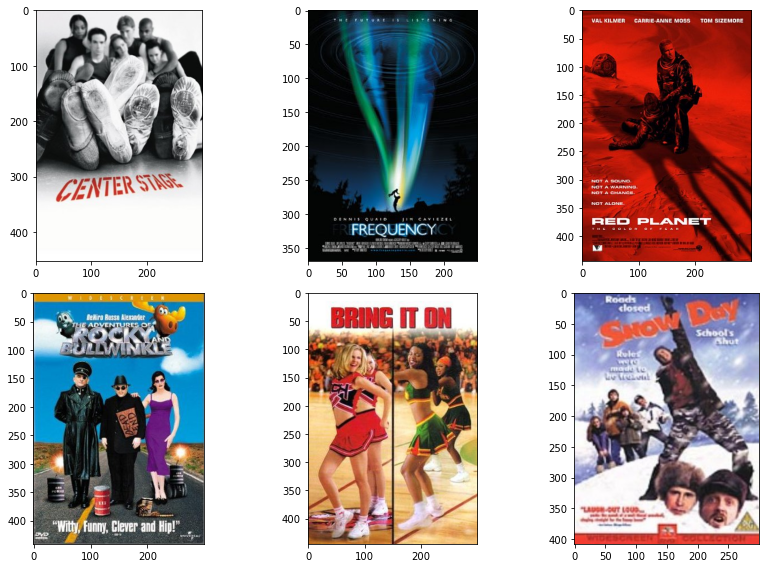

In [76]:
sample_images = get_images()

In [20]:
#après avoir mis notre dataset, il faut des exemples de visage pour entrainer notre modèle

In [77]:
def haar_cascade_detection(sample_images) : 
    face_cascade = cv2.CascadeClassifier("/home/maderles/my_project_dir/haarcascades/haarcascade_frontalface_default.xml")

    for image in tqdm(sample_images) : 
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.05, 5, 50)
    
        for (x_coordinate, y_coordinate, height, width) in faces : 
            cv2.rectangle(image, (x_coordinate, y_coordinate), (x_coordinate + width, y_coordinate + height), (100, 0, 0), 2)

In [78]:
haar_cascade_detection(sample_images)

/tmp/ipykernel_25380/1614501922.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for image in tqdm(sample_images) :


  0%|          | 0/6 [00:00<?, ?it/s]

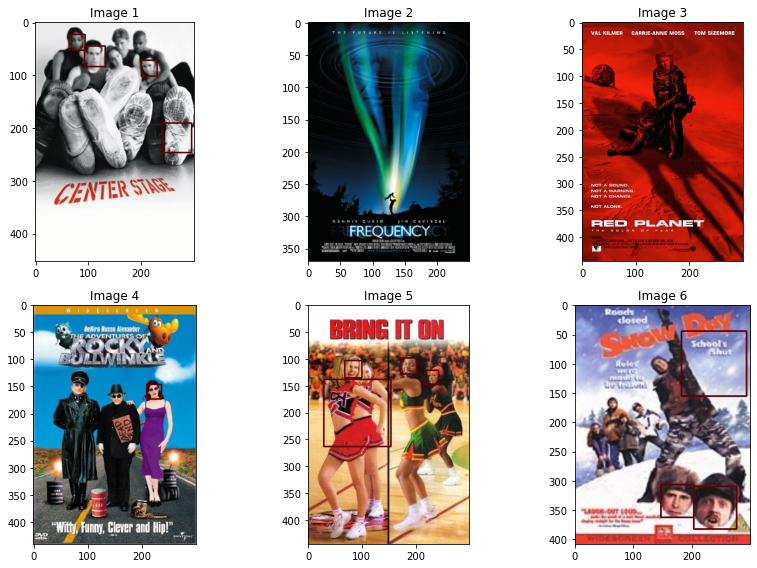

In [79]:
plt.figure(figsize = (12, 8))
for i in range(6) : 
    plt.subplot(2,3, i+1)
    plt.imshow(sample_images[i], cmap = "gray")
    plt.title("Image {}".format(i+1))
    plt.grid(False)
plt.tight_layout() # Automatically adjust subplot parameters to give specified padding.

In [74]:
#technique du mtcnn

#pour la documentation : Le réseau utilise une structure en cascade avec trois réseaux ; d'abord, l'image est redimensionnée à une gamme de tailles différentes (appelée pyramide d'images), puis le premier modèle (Proposal Network ou P-Net) propose des régions faciales candidates, le deuxième modèle (Refine Network ou R-Net) filtre les boîtes de délimitation, et le troisième modèle (Output Network ou O-Net) propose des repères faciaux.

#Le modèle est appelé réseau multi-tâches car chacun des trois modèles de la cascade (P-Net, R-Net et O-Net) est entraîné à trois tâches, c'est-à-dire à trois types de prédictions : classification des visages, régression des boîtes de délimitation et localisation des points de repère faciaux.


In [14]:
!pip3 install mtcnn

In [81]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

In [90]:
def mtcnn_detector(sample_images) : 
    for image in tqdm(sample_images) : 
        face_location = detector.detect_faces(image)
        i = 0
        for face in zip(face_location) : 
            x_coordinate, y_coordinate, width, height = face[0]['box']
            #face_landmarks = face[0]['keypoints']
            cv2.rectangle(image, (x_coordinate, y_coordinate), (x_coordinate + width, y_coordinate + height), (0,0,100), 2)
            cv2.putText(image, 'face num '+str(i), (x_coordinate -10, y_coordinate-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            i += 1
            print(face_location,i)
            #print(face)
            #print(face_location)

In [91]:
mtcnn_detector(sample_images)

/tmp/ipykernel_25380/3033171207.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for image in tqdm(sample_images) :


  0%|          | 0/6 [00:00<?, ?it/s]

[{'box': [176, 100, 24, 32], 'confidence': 0.9982201457023621, 'keypoints': {'left_eye': (181, 110), 'right_eye': (193, 111), 'nose': (184, 116), 'mouth_left': (181, 123), 'mouth_right': (192, 124)}}, {'box': [123, 100, 17, 19], 'confidence': 0.9386193156242371, 'keypoints': {'left_eye': (128, 109), 'right_eye': (135, 106), 'nose': (133, 111), 'mouth_left': (132, 116), 'mouth_right': (138, 114)}}] 1
[{'box': [176, 100, 24, 32], 'confidence': 0.9982201457023621, 'keypoints': {'left_eye': (181, 110), 'right_eye': (193, 111), 'nose': (184, 116), 'mouth_left': (181, 123), 'mouth_right': (192, 124)}}, {'box': [123, 100, 17, 19], 'confidence': 0.9386193156242371, 'keypoints': {'left_eye': (128, 109), 'right_eye': (135, 106), 'nose': (133, 111), 'mouth_left': (132, 116), 'mouth_right': (138, 114)}}] 2
[{'box': [149, 304, 48, 59], 'confidence': 0.9984133243560791, 'keypoints': {'left_eye': (163, 323), 'right_eye': (186, 327), 'nose': (171, 342), 'mouth_left': (161, 350), 'mouth_right': (181, 3

0
1
2
3
4
5


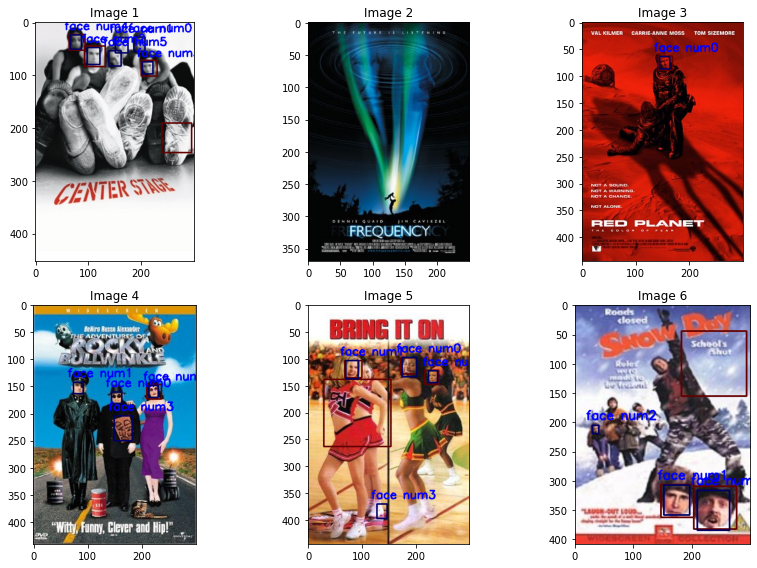

In [85]:
plt.figure(figsize = (12, 8))
for i in range(6) : 
    plt.subplot(2,3, i+1)
    print(i)
    plt.imshow(sample_images[i], cmap = "gray")
    plt.title("Image {}".format(i+1))
    plt.grid(False)
plt.tight_layout()